# Hoeffding's inequality vs. Central Limit Theorem

**References:**
- https://en.wikipedia.org/wiki/Hoeffding%27s_inequality
- https://en.wikipedia.org/wiki/Central_limit_theorem
- https://ocw.mit.edu/courses/mathematics/18-650-statistics-for-applications-fall-2016/lecture-videos/lecture-2-video/

## Setup

\begin{equation}
    X_{1}, X_{2}, X_{3}, ..., X_{n} \sim \mathcal{D}
\end{equation}

where $X_{i}$ are independent, identically distributed samples from distribution $\mathcal{D}$.

Properties of $X_{i}=X$:
- $E[X] = \mu$
- $Var[X] = \sigma^{2}$

### Hoeffding's inequality

\begin{equation}
    P\left[ |\bar{X_{n}} - \mu| \geq \epsilon \right]
    \leq
    2
    \exp\left\{ - \frac{-2 n \epsilon^{2}}{(b-a)^{2}} \right\}
\end{equation}

### Central Limit Theorem (CLT)

In [123]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [144]:
p_true = 0.3
sample_size = 100
nexperiments = 1000

In [145]:
var_bernoulli = p_true*(1.0-p_true)
sigma_bernoulli = np.sqrt(var_bernoulli)

In [146]:
experiments = [scipy.stats.bernoulli.rvs(p=p_true, size=sample_size) for i in range(nexperiments)]

In [147]:
Rn = np.mean(experiments, axis=1)

In [148]:
Y = Rn - p_true
Z = Y/(sigma_bernoulli/np.sqrt(sample_size))

In [149]:
std_normal_x = np.linspace(-5.0, 5.0, 100)
std_normal_y = scipy.stats.norm.pdf(std_normal_x)

/home/edy/lib/build/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


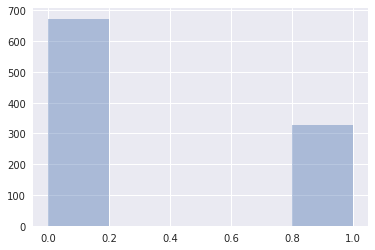

In [152]:
fig, ax = plt.subplots()
sns.distplot(x, ax=ax, kde=False)

/home/edy/lib/build/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


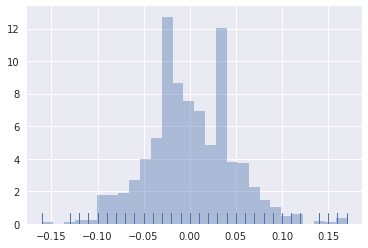

In [153]:
fig, ax = plt.subplots()
sns.distplot(Y, kde=False, norm_hist=True, ax=ax, rug=True)
#ax.plot(std_normal_x, std_normal_y)

/home/edy/lib/build/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


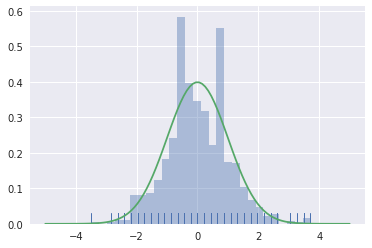

In [151]:
fig, ax = plt.subplots()
sns.distplot(Z, kde=False, norm_hist=True, ax=ax, rug=True)
ax.plot(std_normal_x, std_normal_y)

In [170]:
epsilon = 0.08

In [171]:
ncounts = sum(np.where(abs(Y) > epsilon, True, False))
freq = ncounts/len(Y)
freq

0.078

In [172]:
2.0 * scipy.stats.norm.cdf(-epsilon/(sigma_bernoulli/np.sqrt(sample_size)))

0.08085559837005224

In [173]:
2.0 * np.exp(-2.0*sample_size*(epsilon**2))

0.55607460090638827